In [92]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import pandas as pd
import nltk
import random
import os
from sklearn import datasets
from gensim.models import Word2Vec
import os
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from nltk import WordNetLemmatizer, word_tokenize, bigrams, ngrams, RegexpTokenizer
import gensim
from cycler import cycler
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:95% !important; }</style>"))
cmap=plt.cm.tab10
c = cycler('color', cmap(np.linspace(0,1,10)))
plt.rcParams["axes.prop_cycle"] = c
from gensim import corpora, models, similarities, matutils
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
# Generate sentences for training word2vec



lemmatize = WordNetLemmatizer()





# sentences = spam_data.text.str.split()
categories = ['alt.atheism', 'comp.graphics', 'rec.sport.baseball']
ng_train = datasets.fetch_20newsgroups(subset='train', 
                                       categories=categories, 
                                       remove=('headers', 'footers', 'quotes'))


documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
              "Relation of user perceived response time to error measurement",
              "The generation of random binary unordered trees",
              "The intersection graph of paths in trees",
              "Graph minors IV Widths of trees and well quasi ordering",
              "Graph minors A survey"]




google_vec_file = '~/Downloads/GoogleNews-vectors-negative300.bin'

model = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)

def clean_text(text):
    tokens = word_tokenize(text)
    clean_tokens = [lemmatize.lemmatize(token.lower().strip()) for token in tokens]
    return ' '.join(clean_tokens)



# spam_data = pd.read_csv('./data/spam.csv', sep=',')
# spam_data['text'] = spam_data['text'].apply(clean_text)


def get_doc_vec(words, model):
    good_words = []
    for word in words:
        # Words not in the original model will fail
        try:
            if model.wv[word] is not None:
                good_words.append(word)
        except:
            continue
    # If no words are in the original model
    if len(good_words) == 0:
        return None
    # Return the mean of the vectors for all the good words
    return model.wv[good_words].mean(axis=0)


from sklearn.decomposition import NMF, TruncatedSVD


cray_model = Word2Vec(documents, size=100, window=5, min_count=5, workers=4)

In [93]:
import pickle as pkl
with open('data/messages.pkl','rb') as file:
    messages=pkl.load(file)
    
df_messages=pd.DataFrame({'messages':messages})
messages_pd_series= df_messages['messages']

In [94]:

vecs = messages_pd_series.str.split().map(lambda x: get_doc_vec(x, model))

w=[]
for y in vecs:
    if type(y) == np.ndarray:
        w.append(y)
    else:
        pass

new_vecs=np.vstack(w)

In [97]:
km=KMeans(n_clusters=3)
small_sample=np.random.choice(range(len(test)),5000,replace=False)
X_embedded=TSNE(n_components=2, perplexity=50).fit_transform(test[small_sample])

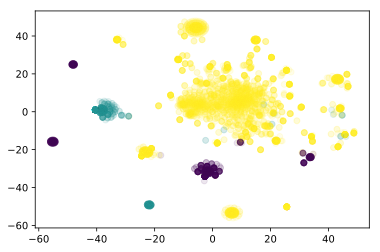

In [98]:
x=X_embedded[:,0]
y=X_embedded[:,1]
import matplotlib.pyplot as plt
plt.scatter(x,y,c=km.fit_predict(test[small_sample]),alpha=.1)
plt.show()

Let's package that into a function.

In [ ]:
def cluster(text,n_clusters=3,encoder=)

# Some notes + examples on how to clean text

In [506]:
import string
bad_list=['!','?',':','TANG','INA','PUTANG']
def printify(s):
    printable = set(string.printable)
    return ''.join(list(filter(lambda x: (x in printable) and (x not in bad_list), s)))

import enchant
d = enchant.Dict("en_US")
d.check("Hello")

count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")

In [518]:
def anglify(m):
    return ' '.join([x for x in word_tokenize(printify(m)) if d.check(x)])

anglify(messages[4323])

'I do care'

In [538]:
long_messages=[''.join(anglify(m)) for m in messages if len(m.split()) >50]

In [481]:
printify('you what is !!!!!!^(*^(*&())) up')

'you what is ^(*^(*&())) up'

In [319]:
counts = count_vectorizer.transform(['zup','how','is','it','going']).transpose()

In [318]:
corpus = matutils.Sparse2Corpus(counts)

In [ ]:
# stoplist = set('for a of the and to in'.split())
# texts = [[word for word in document.lower().split() if word not in stoplist]
#          for document in documents]

In [102]:
lemmatize.lemmatize('pots')

'pot'